In [1]:
import pandas as pd
import xgboost as xgb
from config import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

train=pd.read_csv('data/all_train.csv')
train_x = train.drop(['label'],axis=1)
train_y = train.label

# X_train,X_val,y_train,y_val=train_test_split(train_x,train_y,random_state=0,test_size=0.25)

In [2]:
test=pd.read_csv('data/all_test.csv')
test_x = test.drop(['User_id','Coupon_id','Merchant_id','Date_received'],axis=1)
test_preds = test[['User_id','Coupon_id','Date_received']]

print train_x.shape,test_x.shape
test = xgb.DMatrix(test_x)

(454039, 40) (128993, 40)


In [3]:
# X_train = xgb.DMatrix(X_train,label=y_train)
# X_val = xgb.DMatrix(X_val,label=y_val)


train = xgb.DMatrix(train_x,label=train_y)

In [4]:
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }

In [5]:
# watchlist = [(X_train,'train'),(X_val,'val')]

# model0 = xgb.train(params,X_train,num_boost_round=3000,evals=watchlist,early_stopping_rounds=300)#,xgb_model=model)

watchlist = [(train,'train')]

model0 = xgb.train(params,train,num_boost_round=3500,evals=watchlist,early_stopping_rounds=300)#,xgb_model=model)


[0]	train-auc:0.856302
Will train until train-auc hasn't improved in 300 rounds.
[1]	train-auc:0.861291
[2]	train-auc:0.862003
[3]	train-auc:0.863831
[4]	train-auc:0.866234
[5]	train-auc:0.866846
[6]	train-auc:0.867759
[7]	train-auc:0.868831
[8]	train-auc:0.869316
[9]	train-auc:0.869969
[10]	train-auc:0.869896
[11]	train-auc:0.869773
[12]	train-auc:0.869591
[13]	train-auc:0.869891
[14]	train-auc:0.870102
[15]	train-auc:0.869997
[16]	train-auc:0.869505
[17]	train-auc:0.870069
[18]	train-auc:0.870074
[19]	train-auc:0.870319
[20]	train-auc:0.870162
[21]	train-auc:0.870609
[22]	train-auc:0.871149
[23]	train-auc:0.871213
[24]	train-auc:0.87163
[25]	train-auc:0.871828
[26]	train-auc:0.871638
[27]	train-auc:0.871626
[28]	train-auc:0.871671
[29]	train-auc:0.871364
[30]	train-auc:0.871255
[31]	train-auc:0.871621
[32]	train-auc:0.871485
[33]	train-auc:0.871586
[34]	train-auc:0.871681
[35]	train-auc:0.87174
[36]	train-auc:0.871938
[37]	train-auc:0.87203
[38]	train-auc:0.872109
[39]	train-auc:0.87

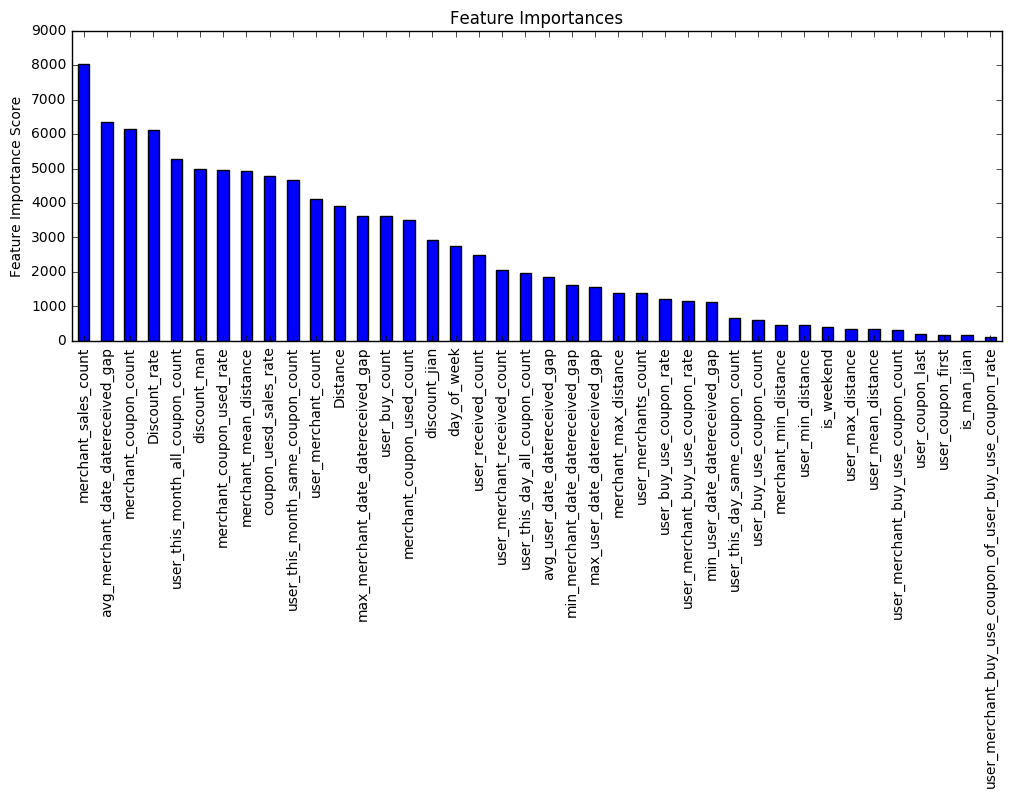

In [7]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(model0.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [6]:
model = xgb.Booster()
model.load_model("0002.model")

In [3]:
#train on dataset1, evaluate on dataset2
# watchlist = [(train1,'train'),(train2,'val')]


watchlist = [(train,'train')]
# model = xgb.train(params,train,num_boost_round=300,evals=watchlist) #,early_stopping_rounds=300,xgb_model=model)
model = xgb.train(params,train,num_boost_round=3500,evals=watchlist,early_stopping_rounds=300)

# watchlist = [(train,'train')]
# model = xgb.train(params,train,num_boost_round=3500,evals=watchlist)


[0]	train-auc:0.850958
Will train until train-auc hasn't improved in 300 rounds.
[1]	train-auc:0.860001
[2]	train-auc:0.863665
[3]	train-auc:0.865493
[4]	train-auc:0.866353
[5]	train-auc:0.867034
[6]	train-auc:0.866425
[7]	train-auc:0.867248
[8]	train-auc:0.867865
[9]	train-auc:0.868142
[10]	train-auc:0.868299
[11]	train-auc:0.868715
[12]	train-auc:0.869074
[13]	train-auc:0.869183
[14]	train-auc:0.869457
[15]	train-auc:0.869883
[16]	train-auc:0.869963
[17]	train-auc:0.869909
[18]	train-auc:0.870008
[19]	train-auc:0.870339
[20]	train-auc:0.870888
[21]	train-auc:0.870609
[22]	train-auc:0.870689
[23]	train-auc:0.870676
[24]	train-auc:0.870926


KeyboardInterrupt: 

In [4]:
model.best_score

0.885619

In [ ]:
model.save_model('001.model')

In [19]:
model2 = xgb.Booster()
model2.load_model("0002.model")

In [ ]:
# watchlist2 = [(train1,'train'),(train2,'val')]
# model2 = xgb.train(params,train1,num_boost_round=300,evals=watchlist2,early_stopping_rounds=300,xgb_model=model2)

In [8]:
#predict test set
test_preds.loc[:,'Probability'] = model0.predict(test)
test_preds.Probability = MinMaxScaler().fit_transform(test_preds.Probability)
test_preds.sort_values(by=['Coupon_id','Probability'],inplace=True)
test_preds.to_csv("preds.csv",index=None)


/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/Cellar/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
